<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">D. Praktikum Filter</p>


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Mounted at /content/drive


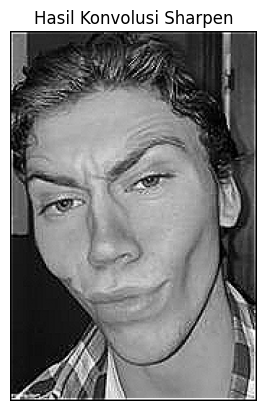

In [ ]:
def convolution2d(image, kernel, stride, padding):
  image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
  kernel_height, kernel_width = kernel.shape
  output_height = (image_padded.shape[0] - kernel_height) // stride + 1
  output_width = (image_padded.shape[1] - kernel_width) // stride + 1

  output = np.zeros((output_height, output_width), dtype=np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      region = image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
      output[y, x] = np.sum(region * kernel)

  return np.clip(output, 0, 255).astype(np.uint8)

img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week6/Mew.jpg')
if img is not None:
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
else:
  print("Error: Could not load image.")

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

convolution2d(img_gray, kernel_sharpen, 1, 2)

result = convolution2d(img_gray, kernel_sharpen, 1, 2)
plt.imshow(result, cmap='gray')
plt.title('Konvolusi Sharpen')
plt.axis('off')
plt.show()


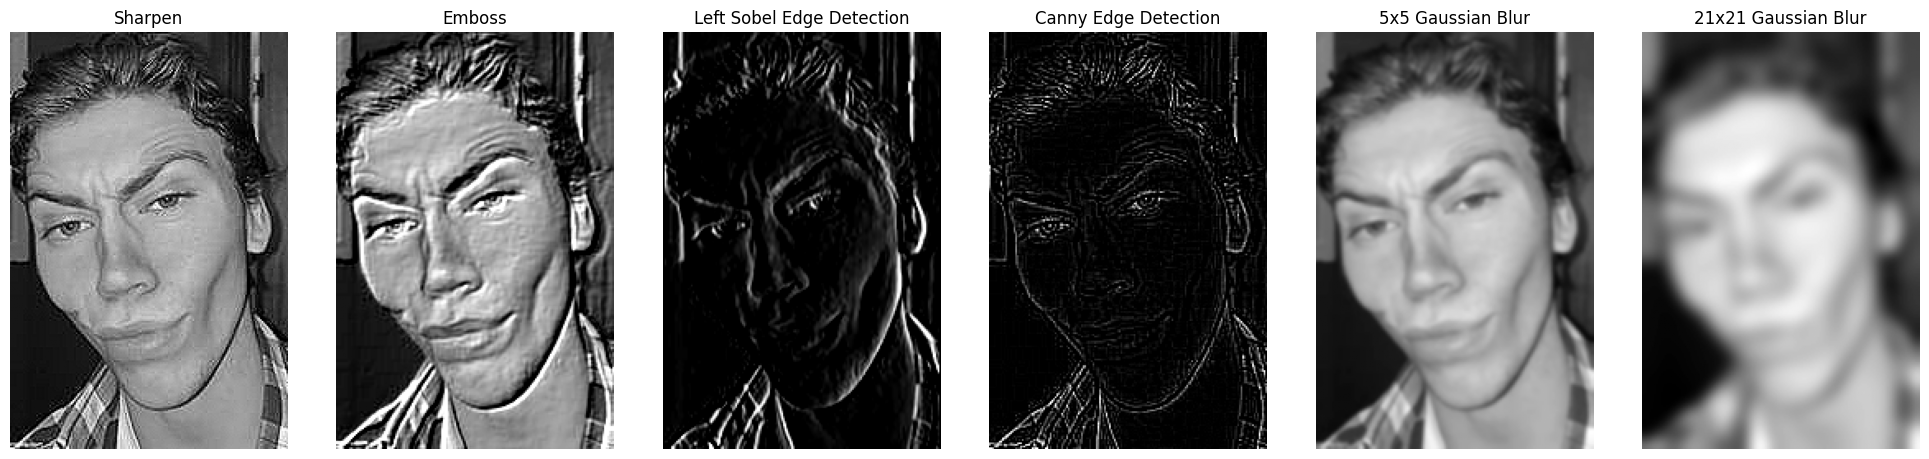

In [ ]:
image = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week6/Mew.jpg', cv.IMREAD_GRAYSCALE)

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [ 0, 1, 2]])

sobel_kernel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

canny_kernel = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256

def generate_gaussian_kernel_21x21():
    kernel_size = 21
    sigma = math.sqrt(kernel_size)
    gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
    gauss_kernel = gaussian_kernel @ gaussian_kernel.T
    return gauss_kernel

gaussian_kernel_21 = generate_gaussian_kernel_21x21()

# Proses semua filter
results = [
    (cv.filter2D(image, -1, sharpen_kernel), "Sharpen"),
    (cv.filter2D(image, -1, emboss_kernel), "Emboss"),
    (cv.filter2D(image, -1, sobel_kernel), "Left Sobel Edge Detection"),
    (cv.filter2D(image, -1, canny_kernel), "Canny Edge Detection"),
    (cv.filter2D(image, -1, gaussian_kernel), "5x5 Gaussian Blur"),
    (cv.filter2D(image, -1, gaussian_kernel_21), "21x21 Gaussian Blur")
]


plt.figure(figsize=(20, 5))
for i, (img, title) in enumerate(results):
    plt.subplot(1, len(results), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout(pad=3)
plt.show()

---


<p align="center">E. Filter Library & Filter Modern</p>


---



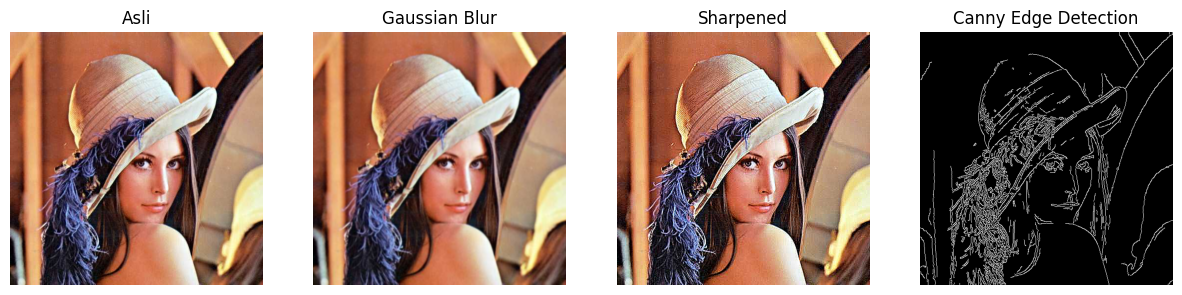

In [ ]:
# Percobaan 1

# Fungsi tampil berdampingan
def show_sidebyside(images, titles, figsize=(15,5)):
  plt.figure(figsize=figsize)
  for i, (img, title) in enumerate(zip(images, titles)):
    if len(img.shape) == 2: # Grayscale
      plt.subplot(1, len(images), i+1)
      plt.imshow(img, cmap='gray')
    else:
      plt.subplot(1, len(images), i+1)
      plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
  plt.show()

img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/lena.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_sidebyside([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

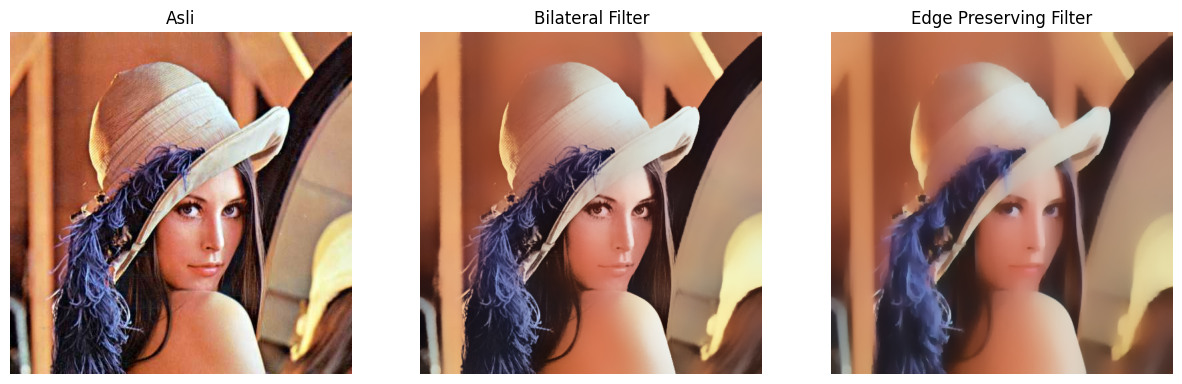

In [ ]:
# Percobaan 2

# Filter Modern dari OpenCV
# Bilateral FIlter (edge-preserving)

bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_sidebyside([img, bilateral, edge_preserve],
                ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

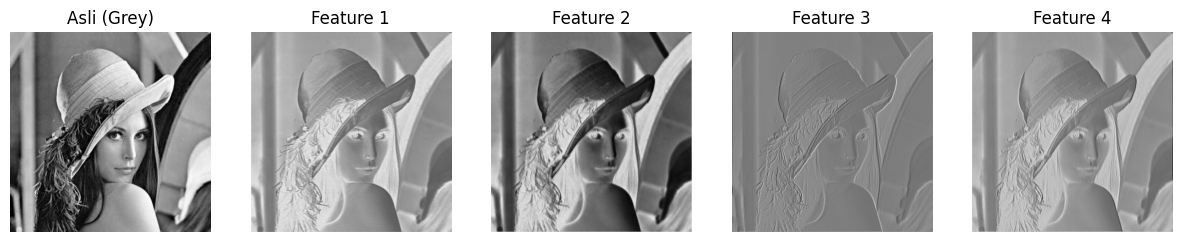

In [ ]:
# Percobaan 3
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)


  def forward(self, x):
    return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Hasil CNN
with torch.no_grad():
  features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_sidebyside([img_gray] + feature_maps, ["Asli (Grey)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

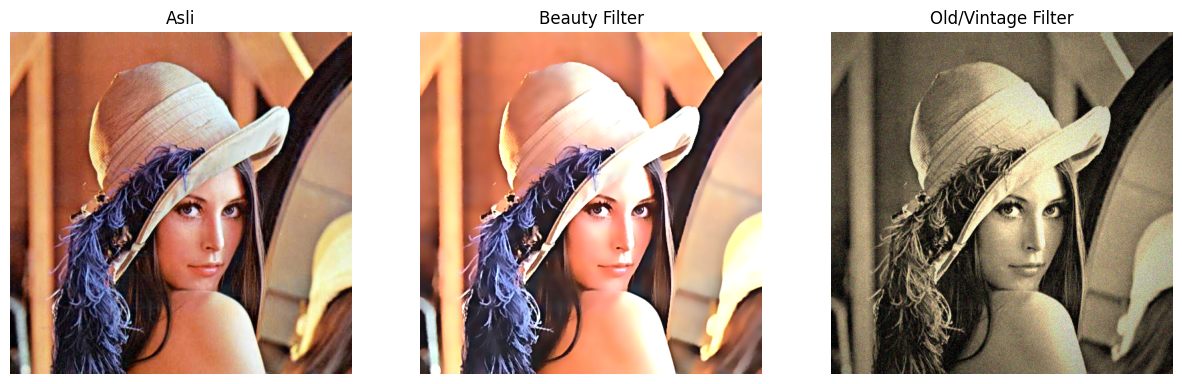

In [ ]:
# Percobaan 4

# =======================
# 1. Beauty Filter
# =======================
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & Contrast
alpha = 1.2 # Contrast
beta = 15 # Brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# =======================
# 2. Old/Bintage Filter
# =======================
# Step 1: Sepia tone
sepia_kernal = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernal)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
  vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0,15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

show_sidebyside(
    [img, beauty, old_img],
    ["Asli", "Beauty Filter", "Old/Vintage Filter"]
)

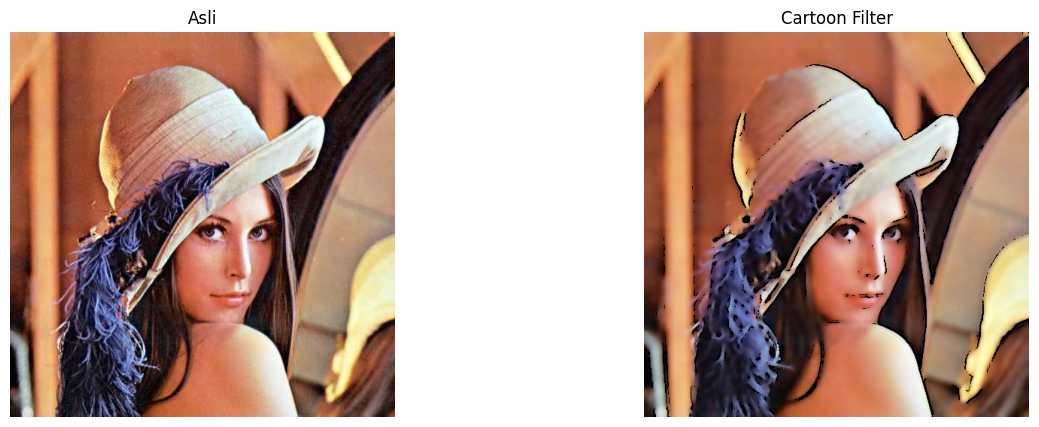

In [ ]:
# Percobaan 5
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (Cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

#Tampilkan
show_sidebyside([img, cartoon], ["Asli", "Cartoon Filter"])

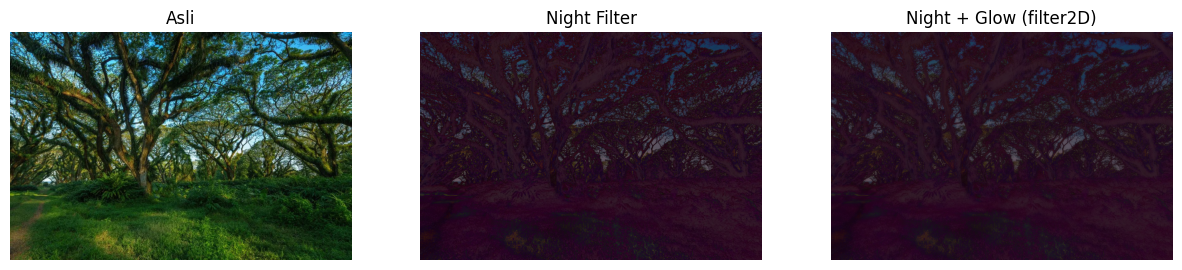

In [ ]:
# Percobaan 6

# Night Filter
img = cv.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week6/djawatan.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (Contrast turn, Brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) #BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_sidebyside([img, night, night_glow],
                ["Asli", "Night Filter", "Night + Glow (filter2D)"])

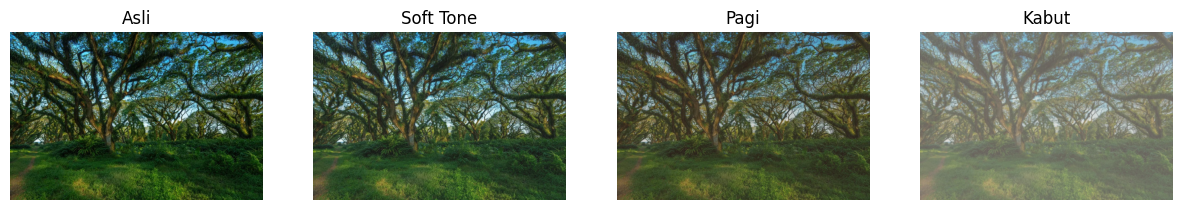

In [ ]:
# Percobaan 7

# Filter Suasana Pagi dan Kabut
# =========================
# Step 1: Kurangi Kontras & cerahkan
# =========================
alpha = 0.9 # Contrast
beta = 20 # Brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)


# =========================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# =========================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# =========================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# =========================
# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3,3)
kernel = kernel @ kernel.T # Jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# Tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_sidebyside([img, soft, pagi, kabut],
                ["Asli", "Soft Tone", "Pagi", "Kabut"])